In [4]:
pip install nlp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 13.5 MB/s eta 0:00:00


In [5]:
pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.4 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
  Attempting uninstall: dill
    Found existing installation: dill 0.3.9
    Uninstalling dill-0.3.9:
      Successfully uninstalled dill-0.3.9
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


#Importing Dependencies

In [6]:
import pandas as pd
import numpy as np
from transformers import pipeline
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nlp


import torch
import torch.nn.functional as F


#Preprocessing


In [7]:
from datasets import load_dataset

original_hf_dataset = load_dataset("poem_sentiment")

original_hf_dataset

README.md:   0%|          | 0.00/5.70k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/35.6k [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/6.34k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/6.16k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/892 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/105 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/104 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['id', 'verse_text', 'label'],
        num_rows: 892
    })
    validation: Dataset({
        features: ['id', 'verse_text', 'label'],
        num_rows: 105
    })
    test: Dataset({
        features: ['id', 'verse_text', 'label'],
        num_rows: 104
    })
})

In [8]:
train_ds = original_hf_dataset["train"]
train_ds

Dataset({
    features: ['id', 'verse_text', 'label'],
    num_rows: 892
})

In [9]:
label_names = original_hf_dataset["train"].features['label'].names
label_names

['negative', 'positive', 'no_impact', 'mixed']

In [10]:
train_ds[2]

{'id': 2, 'verse_text': 'and that is why, the lonesome day,', 'label': 0}

In [11]:
train_ds.column_names

['id', 'verse_text', 'label']

In [12]:
train_ds.features

{'id': Value(dtype='int32', id=None),
 'verse_text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['negative', 'positive', 'no_impact', 'mixed'], id=None)}

In [13]:
train_ds['verse_text'][:4]

['with pale blue berries. in these peaceful shades--',
 'it flows so long as falls the rain,',
 'and that is why, the lonesome day,',
 'when i peruse the conquered fame of heroes, and the victories of mighty generals, i do not envy the generals,']

In [14]:
train = pd.DataFrame(train_ds)
train.head()

,id,verse_text,label
0,0,with pale blue berries. in these peaceful shad...,1
1,1,"it flows so long as falls the rain,",2
2,2,"and that is why, the lonesome day,",0
3,3,"when i peruse the conquered fame of heroes, an...",3
4,4,of inward strife for truth and liberty.,3


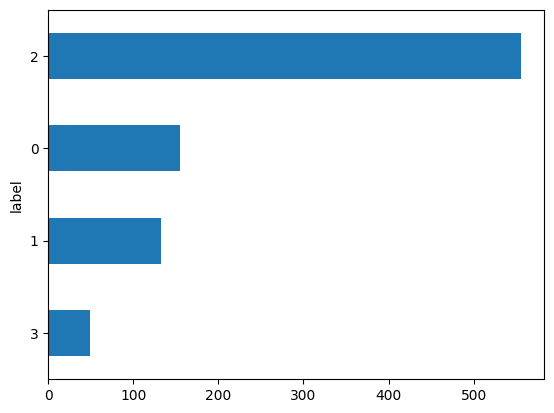

In [16]:
train['label'].value_counts(ascending = True).plot.barh()
plt.show()

#Tokenizing


In [17]:
from transformers import AutoTokenizer
model_ckpt = 'distilbert-base-uncased'
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [19]:
print('tokenizer vocab size:', tokenizer.vocab_size)
print('tokenizer model max length:', tokenizer.model_max_length)
print('feature_names:', tokenizer.model_input_names)

tokenizer vocab size: 30522
tokenizer model max length: 512
feature_names: ['input_ids', 'attention_mask']


In [20]:
def tokenize(batch):
  return tokenizer(batch['verse_text'], padding = True, truncation = True)

In [27]:
print(tokenize(train_ds[:2]))

{'input_ids': [[101, 2007, 5122, 2630, 22681, 1012, 1999, 2122, 9379, 13178, 1011, 1011, 102], [101, 2009, 6223, 2061, 2146, 2004, 4212, 1996, 4542, 1010, 102, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0]]}


In [36]:
ds_pretrained_features_encoded = original_hf_dataset.map(tokenize, batched = True, batch_size = None)

Map:   0%|          | 0/105 [00:00<?, ? examples/s]

Map:   0%|          | 0/104 [00:00<?, ? examples/s]

In [37]:
print('Features names of Dataset:', ds_pretrained_features_encoded['train'].column_names)

Features names of Dataset: ['id', 'verse_text', 'label', 'input_ids', 'attention_mask']


#Using Pretrained DistilBert

In [38]:
from transformers import AutoModel

model_ckpt = 'distilbert-base-uncased'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = AutoModel.from_pretrained(model_ckpt).to(device)

In [39]:
def get_hidden_state(batch):
    inputs = {k:v.to(device) for k, v in batch.items()
                if k in tokenizer.model_input_names }

    with torch.no_grad():
        last_hidden_state = model(**inputs).last_hidden_state

    return {'hidden_state': last_hidden_state[:, 0].cpu().numpy() }

ds_pretrained_features_encoded.set_format('torch', columns = ["input_ids", "attention_mask", "label"] )

pretrained_hidden_states = ds_pretrained_features_encoded.map(get_hidden_state, batched=True)

pretrained_hidden_states['train'].column_names

Map:   0%|          | 0/105 [00:00<?, ? examples/s]

Map:   0%|          | 0/104 [00:00<?, ? examples/s]

['id', 'verse_text', 'label', 'input_ids', 'attention_mask', 'hidden_state']

In [40]:
pretrained_hidden_states


DatasetDict({
    train: Dataset({
        features: ['id', 'verse_text', 'label', 'input_ids', 'attention_mask', 'hidden_state'],
        num_rows: 892
    })
    validation: Dataset({
        features: ['id', 'verse_text', 'label', 'input_ids', 'attention_mask', 'hidden_state'],
        num_rows: 105
    })
    test: Dataset({
        features: ['id', 'verse_text', 'label', 'input_ids', 'attention_mask', 'hidden_state'],
        num_rows: 104
    })
})

In [42]:
X_train = np.array(pretrained_hidden_states['train']['hidden_state'])
X_valid = np.array(pretrained_hidden_states['validation']['hidden_state'])

y_train = np.array(pretrained_hidden_states['train']['label'])
y_valid = np.array(pretrained_hidden_states['validation']['label'])

In [43]:
pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.8 MB/s eta 0:00:00


In [47]:
from umap import UMAP
from sklearn.preprocessing import MinMaxScaler

# Scale features to [0,1] range
X_train_scaled = MinMaxScaler().fit_transform(X_train)

# initialize and fit UMAP
mapper = UMAP(n_components = 2, metric="cosine").fit(X_train_scaled)

# Create a Dataframe of 2D embeddings

df_embedded_from_hidden = pd.DataFrame(mapper.embedding_,columns=["X","Y"])

df_embedded_from_hidden["label"] = y_train

display(df_embedded_from_hidden.head())

,X,Y,label
0,10.732761,3.839971,1
1,6.701192,6.667176,2
2,7.253153,3.862330,0
3,6.043196,6.602427,3
4,9.601043,5.053621,3


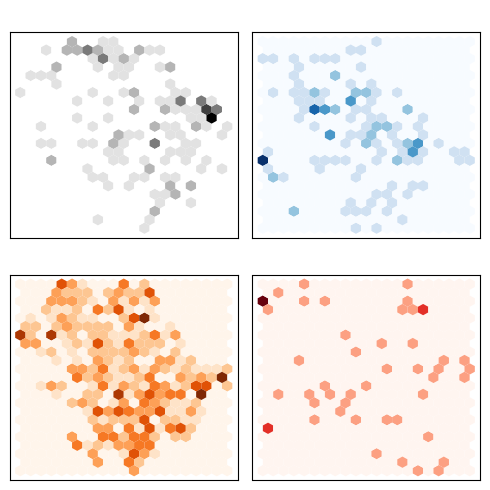

In [48]:
fig,axes = plt.subplots(2, 2, figsize=(5,5))

#1D axises
axes = axes.flatten()

#Color used
cmaps = ['Greys', "Blues", "Oranges", "Reds", "Purples", "Greens"]

#Labels name of original_hf_dataset
labels = original_hf_dataset["train"].features["label"].names

#separate
for i,(label, cmap) in enumerate(zip(labels, cmaps)):
    df_embedding_subplot = df_embedded_from_hidden.query(f"label == {i}")
    axes[i].hexbin(df_embedding_subplot["X"], df_embedding_subplot["Y"], cmap=cmap,
                  gridsize= 20, linewidths=(0,))
    axes[i].set_title(label, color='white')
    axes[i].set_xticks([]),axes[i].set_yticks([])

plt.tight_layout()
plt.show()

#Simple Logistic Classifier

In [49]:
from sklearn.linear_model import LogisticRegression
# Max iteration (3000)
lr_clf = LogisticRegression(max_iter = 3000)
lr_clf.fit(X_train, y_train)
print('Logistic Regression_Score',lr_clf.score(X_valid, y_valid))

Logistic Regression_Score 0.780952380952381


In [50]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy='most_frequent')

dummy_clf.fit(X_train, y_train)

print(dummy_clf.score(X_valid, y_valid))

0.6571428571428571


In [52]:
from transformers import AutoModelForSequenceClassification

num_labels = len(original_hf_dataset['train'].features['label'].names)

model = (AutoModelForSequenceClassification.from_pretrained(model_ckpt, num_labels=num_labels ).to(device) )

from sklearn.metrics import accuracy_score, f1_score

def compute_metric(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average = 'weighted')
    acc = accuracy_score(labels, preds)
    return {'accuracy': acc, 'f1': f1}

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [55]:
from transformers import Trainer, TrainingArguments

batch_size = 12

logging_steps = len(ds_pretrained_features_encoded['train']) // batch_size

model_name = f"{model_ckpt}-finetune-poem"

training_args = TrainingArguments(output_dir = model_name,
                                  num_train_epochs=20,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  weight_decay=0.01,
                                  evaluation_strategy="epoch",
                                  disable_tqdm=False,
                                  logging_steps=logging_steps,
                                  push_to_hub=False,
                                  log_level="error"
                                  )

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [56]:
trainer = Trainer(model=model, args=training_args, compute_metrics=compute_metric,
                  train_dataset = ds_pretrained_features_encoded['train'],
                  eval_dataset = ds_pretrained_features_encoded["validation"],
                  tokenizer = tokenizer
                  )
trainer.train()

<ipython-input-56-a338f93b5cd1>:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(model=model, args=training_args, compute_metrics=compute_metric,


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.660300,0.518311,0.838095,0.822329
2,0.360400,0.614269,0.838095,0.811481
3,0.233500,0.566354,0.857143,0.850762
4,0.158200,0.578126,0.847619,0.842046
5,0.083700,0.617875,0.866667,0.863155
6,0.042900,0.635293,0.838095,0.844048
7,0.022100,0.710911,0.866667,0.862662
8,0.005000,0.795379,0.876190,0.868087
9,0.002600,0.773342,0.876190,0.868087
10,0.001800,0.785473,0.866667,0.859264


TrainOutput(global_step=1500, training_loss=0.07811912186940512, metrics={'train_runtime': 4197.8535, 'train_samples_per_second': 4.25, 'train_steps_per_second': 0.357, 'total_flos': 129243115384320.0, 'train_loss': 0.07811912186940512, 'epoch': 20.0})

In [57]:
preds_output = trainer.predict(ds_pretrained_features_encoded['validation'])

In [58]:
preds_output.metrics

{'test_loss': 0.8550918102264404,
 'test_accuracy': 0.8666666666666667,
 'test_f1': 0.8592641715929387,
 'test_runtime': 12.7273,
 'test_samples_per_second': 8.25,
 'test_steps_per_second': 0.707}

In [59]:
from torch.nn.functional import cross_entropy

def forward_pass_with_loss_and_label(batch):
    """
    This function performs a forward pass through the model, computes the loss and predicts labels.

    Args:
        batch (Dict[str, torch.Tensor]): Dictionary containing the model inputs and labels.

    Returns:
        Dict[str, Union[torch.Tensor, np.ndarray]]: Dictionary with the computed loss and predicted labels.
    """
    # Move the model inputs to the GPU (if available)
    # This is necessary because the model itself is likely on the GPU
    # Only model input names are included, other keys (e.g., 'labels') are ignored
    inputs = {k: v.to(device) for k, v in batch.items()
              if k in tokenizer.model_input_names }

    # Ensures that gradients are not computed, saving memory
    with torch.no_grad():
        # Forward pass through the model
        output = model(**inputs)

        # Predict labels by selecting the argmax of the logits along the last dimension
        pred_label = torch.argmax(output.logits, axis=-1)

        # Compute the cross-entropy loss between the logits and true labels
        # reduction='none' ensures that we get a loss value for each sample, not the mean loss
        loss = cross_entropy(output.logits, batch['label'].to(device), reduction='none')

    # Returns the loss and predicted labels as numpy arrays
    # These are moved to the CPU first, because numpy cannot handle GPU tensors
    return {'loss': loss.cpu().numpy(),
            'predicted_label': pred_label.cpu().numpy()}

In [60]:
#hide_output
# Convert our dataset back to PyTorch tensors
ds_pretrained_features_encoded.set_format("torch",
                            columns=["input_ids", "attention_mask", "label"])
# Compute loss values
ds_pretrained_features_encoded["validation"] = ds_pretrained_features_encoded["validation"].map(
    forward_pass_with_loss_and_label, batched=True, batch_size=16)

Map:   0%|          | 0/105 [00:00<?, ? examples/s]

In [62]:
def label_int2str(row):
    return original_hf_dataset["train"].features['label'].int2str(row)

ds_pretrained_features_encoded.set_format("pandas")

cols = ['verse_text', "label", "predicted_label", "loss"]

df_test = ds_pretrained_features_encoded["validation"][:][cols]

df_test["label"] = df_test["label"].apply(label_int2str)

df_test["predicted_label"] = (df_test["predicted_label"]
                              .apply(label_int2str))

df_test.sort_values('loss', ascending=False ).head(10)

,verse_text,label,predicted_label,loss
6,"taking and giving radiance, and the slopes",positive,no_impact,9.795494
63,on us lift up the light,positive,no_impact,9.762166
22,"let fall on her a rose-leaf rain of dreams,",positive,no_impact,9.562186
66,i kin eat in peace.,positive,no_impact,9.138766
93,from the hushed and silent tomb.,negative,no_impact,8.441733
52,"nor can express the love it knew,",negative,no_impact,7.911602
41,alone went the fair-armed gudrun to her flower...,positive,no_impact,6.902456
73,willis sneered:,negative,no_impact,6.859096
80,strong tarchon snatch’d and bore away his prize.,positive,negative,6.299012
2,on its windy site uplifting gabled roof and pa...,no_impact,negative,6.194623


In [64]:
df_test.sort_values('loss', ascending=True ).head(50)

,verse_text,label,predicted_label,loss
37,"why write i still all one, ever the same,",no_impact,no_impact,0.000115
54,"might, looking up, see dian dip",no_impact,no_impact,0.000115
39,"soon ez she gits out o' sight,",no_impact,no_impact,0.000115
45,"and i greet from far the ray,",no_impact,no_impact,0.000117
74,"from the bed of minnehaha,",no_impact,no_impact,0.000117
44,of things that only children see,no_impact,no_impact,0.000117
49,"no, truly.--i will see her; tell my tale,",no_impact,no_impact,0.000118
64,each lodger here adorns the walls:,no_impact,no_impact,0.000119
28,"what though the claret circled well,",no_impact,no_impact,0.000119
43,"breathe deep, and start, to see him pass the d...",no_impact,no_impact,0.000119
